# ABSTRACT


Price optimization is using historical data to identify the most appropriate price of a product or a service that maximizes the company’s profitability. There are numerous factors like demography, operating costs, survey data, etc that play a role in efficient pricing, it also depends on the nature of businesses and the product that is served.The business regularly adds/upgrades features to bring more value to the product and this obviously has a cost associated with it in terms of effort, time, and most importantly companies reputation.As a result, it is important to understand the correct pricing, a little too high, you lose your customers and slight underpricing will result in loss of revenue. Price optimization helps businesses strike the right balance of efficient pricing, achieving profit objectives, and also serve their customers.

# Importing the Data Set
As mentioned, we will be using a data set of Retail Price Optimization.

The data set has been uploaded as a .csv file from the following URL: https://www.kaggle.com/code/smailaar/retail-price-optimization-ml/input

# 1.Python Libraries

In [127]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

# 2.Data Loading

In [95]:
df = pd.read_excel("retail_price-edited-updated1.xlsx") #Loading the Dataset

In [96]:
df.head(5) # Let us check the first 5 rows of the Datasets 

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39.0,161,2.0,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39.0,161,2.0,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39.0,161,2.0,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39.0,161,2.0,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df.tail(5) # Let us check the last 5 rows of the Datasets 

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
680,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215,56.0,162,5.0,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
681,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209,56.0,162,5.0,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
682,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205,56.0,162,5.0,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
683,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56.0,162,5.0,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
684,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.39871,56.0,162,5.0,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


# 3.Data Wrangling

In [5]:
df.shape

(685, 30)

In [6]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [103]:
df.dtypes #Showing the Datatypes

product_id                     object
product_category_name          object
month_year                     object
qty                            object
total_price                   float64
freight_price                 float64
unit_price                     object
product_name_lenght           float64
product_description_lenght     object
product_photos_qty            float64
product_weight_g              float64
product_score                 float64
customers                     float64
weekday                       float64
weekend                       float64
holiday                       float64
month                         float64
year                          float64
s                             float64
volume                        float64
comp_1                         object
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       677 non-null    object 
 2   month_year                  677 non-null    object 
 3   qty                         677 non-null    object 
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  677 non-null    object 
 7   product_name_lenght         676 non-null    float64
 8   product_description_lenght  677 non-null    object 
 9   product_photos_qty          676 non-null    float64
 10  product_weight_g            676 non-null    float64
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    float64
 13  weekday                     676 non

#It is 685 rows and 30 columns dataset, and there are no null values in it. The output ‘lag_price’ is the target, and there are multiple independent variables that affect this value.This is a type of supervised Machine Learning problem where the output variables are labeled and the model is first trained on split data. The model is then verified for its accuracy on validation/test data.

In [104]:
df.nunique() # Checking the number of unique value for each variable

product_id                     52
product_category_name          10
month_year                     21
qty                            67
total_price                   573
freight_price                 653
unit_price                    281
product_name_lenght            24
product_description_lenght     47
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         89
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        106
ps3                             9
fp3                           229
lag_price     

In [105]:
df.drop("product_id",axis=1,inplace=True) #we removed the 'product_id' coulmn which is not needed for analysis

In [106]:
df.head()

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39.0,161,2.0,350.0,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39.0,161,2.0,350.0,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39.0,161,2.0,350.0,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39.0,161,2.0,350.0,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.describe([0.05,0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,5%,10%,25%,35%,50%,65%,75%,90%,95%,max
total_price,676.0,1422.708728,1700.123100,19.900000,99.987500,154.700000,333.700000,490.670000,807.890000,1337.655000,1887.322500,3460.290000,4756.425000,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,10.978500,12.483421,14.761912,15.853265,17.518472,19.540750,22.713558,36.134119,42.077857,79.76
product_name_lenght,676.0,48.720414,9.420715,29.000000,33.000000,33.000000,40.000000,46.000000,51.000000,56.000000,57.000000,59.000000,59.000000,60.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,2.000000,2.000000,4.000000,5.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,150.000000,200.000000,348.000000,444.000000,950.000000,1550.000000,1850.000000,6050.000000,6550.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.700000,3.800000,3.900000,4.100000,4.100000,4.200000,4.200000,4.300000,4.400000,4.50
customers,676.0,81.028107,62.055560,1.000000,10.000000,17.000000,34.000000,43.000000,62.000000,102.000000,116.000000,159.000000,179.500000,339.00
weekday,676.0,21.773669,0.986104,20.000000,20.000000,20.000000,21.000000,21.000000,22.000000,22.000000,23.000000,23.000000,23.000000,23.00
weekend,676.0,8.658284,0.705600,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,10.000000,10.000000,10.00
holiday,676.0,1.494083,0.940430,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,4.00


In [107]:
df.sort_values("total_price",ascending=False).head(15) #total price highest to lowest

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
682,bed_bath_table,01-07-2017,59,12095.00,22.195932,205,56.0,162,5.0,9750.0,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
284,watches_gifts,01-05-2018,114,11820.20,0.095439,103.792523,33.0,523,3.0,584.0,...,103.792523,4.2,0.095439,105.000000,4.2,11.377297,132.53125,3.8,15.762187,105.648625
683,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56.0,162,5.0,9750.0,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
182,computers_accessories,01-02-2018,69,10343.10,26.552899,149.9,48.0,894,1.0,533.0,...,149,4.2,41.163226,149.900000,4.3,26.552899,78.712281,3.5,14.535915,150.354546
556,health_beauty,01-08-2018,28,9240.00,20.505357,330,60.0,2644,6.0,400.0,...,23.99,4.3,16.770000,82.821429,4.1,12.418571,58.99,3.9,12.083333,330.000000
551,health_beauty,01-03-2018,28,9125.00,19.370357,325.892857,60.0,2644,6.0,400.0,...,23.99,4.3,14.198750,83.740000,4.1,11.876875,58.99,3.9,15.228000,325.000000
283,watches_gifts,01-04-2018,85,8961.49,2.181647,105.648625,33.0,523,3.0,584.0,...,105.648625,4.2,2.181647,105.000000,4.2,13.631429,150.133333,3.8,19.447778,117.441290
506,furniture_decor,01-01-2018,122,8538.00,17.663115,69.995327,44.0,903,6.0,2600.0,...,69.995327,4.1,17.663115,38.400000,3.7,9.340000,99.9,4.4,22.819231,75.000000
185,computers_accessories,01-05-2018,52,7794.80,18.943077,149.9,48.0,894,1.0,533.0,...,119,4.2,39.217200,149.900000,4.3,18.943077,79.8,3.5,14.414545,149.900000
620,watches_gifts,01-07-2018,45,7651.27,17.953556,169.349318,46.0,501,4.0,363.0,...,118.363636,4.2,15.480000,105.000000,4.2,24.938750,155,3.8,16.470000,245.900000


In [108]:
df.sort_values("total_price",ascending=True).head(15) #total price lowest to highest

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
336,consoles_games,01-07-2017,1,19.90,11.85,19.9,56.0,237,3.0,100.0,...,19.9,4.2,13.473077,19.900000,3.9,11.850000,19.9,3.9,11.850000,19.850000
288,cool_stuff,01-09-2017,1,29.50,11.73,29.5,57.0,787,8.0,1867.0,...,99.99,4.2,15.933333,29.500000,4.4,11.730000,29.5,4.4,11.730000,29.450000
631,health_beauty,01-10-2017,1,29.90,11.85,29.9,55.0,388,1.0,250.0,...,23.99,4.3,13.136667,89.990000,4.1,16.562917,58.99,3.9,19.065263,29.850000
343,consoles_games,01-02-2018,1,32.50,11.85,32.5,56.0,237,3.0,100.0,...,32.5,4.2,15.256000,32.500000,3.9,11.850000,32.5,3.9,11.850000,27.033333
475,furniture_decor,01-08-2018,1,35.00,19.44,35,41.0,789,1.0,950.0,...,103.233333,4.1,22.300000,35.000000,3.7,15.628125,83.833333,4.4,23.776667,34.950000
45,consoles_games,01-07-2018,1,36.20,22.18,36.2,49.0,100,4.0,150.0,...,36.2,4.2,22.180000,36.200000,4.2,22.180000,36.2,4.2,22.180000,36.200000
531,furniture_decor,01-07-2017,1,38.40,7.78,38.4,49.0,829,1.0,850.0,...,75,4.1,15.856000,38.400000,3.7,7.780000,38.4,3.7,7.780000,38.350000
464,furniture_decor,01-08-2017,1,38.40,11.85,38.4,41.0,789,1.0,950.0,...,75,4.1,15.376923,38.400000,3.7,12.105000,38.4,3.8,11.850000,38.350000
0,bed_bath_table,01-05-2017,1,45.95,15.10,45.95,39.0,161,2.0,350.0,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
81,health_beauty,01-08-2018,2,47.98,16.77,23.99,48.0,575,1.0,100.0,...,23.99,4.3,16.770000,82.821429,4.1,12.418571,58.99,3.9,12.083333,23.990000


In [109]:
df.isna() #returns a DataFrame object where all the values are replaced with a Boolean value True for NA (not-a -number) values, and otherwise False.

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
683,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:
new_df = df.dropna() # droping the nan values

In [17]:
print(new_df)

    product_category_name  month_year qty  total_price  freight_price  \
0          bed_bath_table  01-05-2017   1        45.95      15.100000   
1          bed_bath_table  01-06-2017   3       137.85      12.933333   
2          bed_bath_table  01-07-2017   6       275.70      14.840000   
3          bed_bath_table  01-08-2017   4       183.80      14.287500   
5          bed_bath_table  01-09-2017   2        91.90      15.100000   
..                    ...         ...  ..          ...            ...   
680        bed_bath_table  01-05-2017   1       215.00       8.760000   
681        bed_bath_table  01-06-2017  10      2090.00      21.322000   
682        bed_bath_table  01-07-2017  59     12095.00      22.195932   
683        bed_bath_table  01-08-2017  52     10375.00      19.412885   
684        bed_bath_table  01-09-2017  32      5222.36      24.324687   

     unit_price  product_name_lenght product_description_lenght  \
0         45.95                 39.0                    

In [111]:
new_df.isna().sum() # to detect the missing values

product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [19]:
new_df['total_price'].value_counts()

199.98     5
140.00     4
1298.70    4
2449.30    4
1138.10    4
          ..
1104.87    1
4249.50    1
3059.64    1
414.00     1
5222.36    1
Name: total_price, Length: 573, dtype: int64

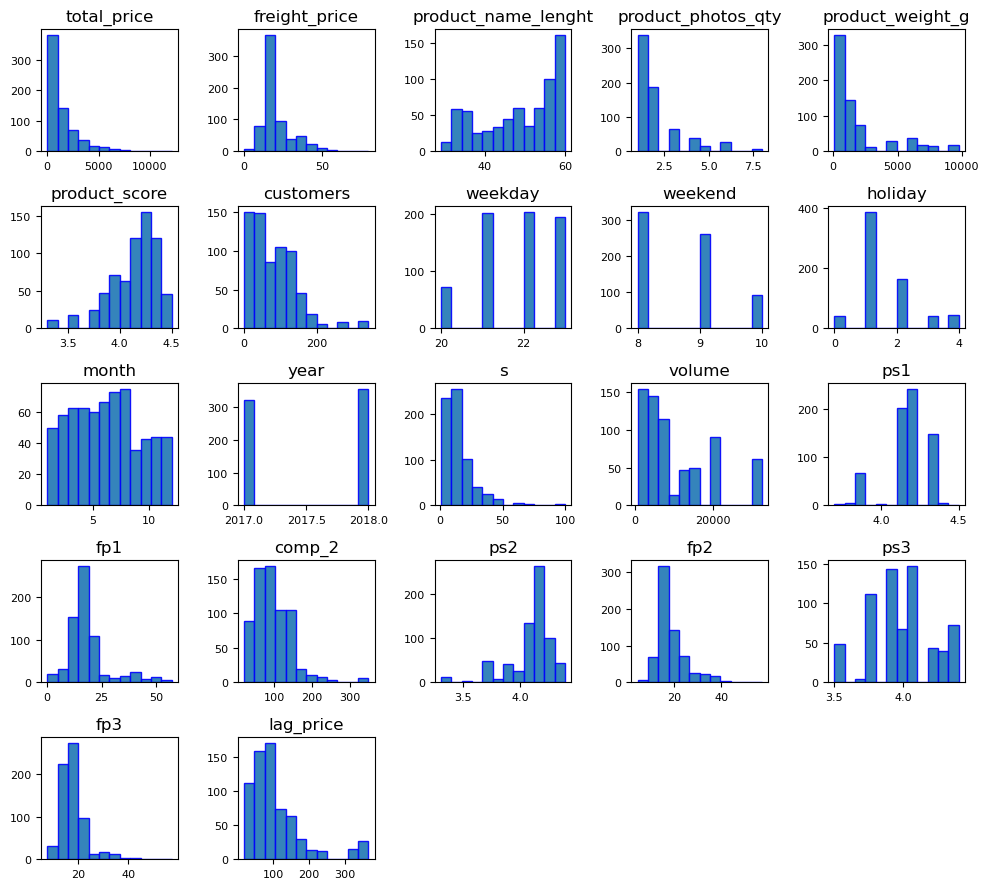

In [20]:
new_df.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

#To Visaulize the outlier we using the Histogram

In [21]:
new_df.describe([0.05,0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,5%,10%,25%,35%,50%,65%,75%,90%,95%,max
total_price,676.0,1422.708728,1700.123100,19.900000,99.987500,154.700000,333.700000,490.670000,807.890000,1337.655000,1887.322500,3460.290000,4756.425000,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,10.978500,12.483421,14.761912,15.853265,17.518472,19.540750,22.713558,36.134119,42.077857,79.76
product_name_lenght,676.0,48.720414,9.420715,29.000000,33.000000,33.000000,40.000000,46.000000,51.000000,56.000000,57.000000,59.000000,59.000000,60.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,2.000000,2.000000,4.000000,5.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,150.000000,200.000000,348.000000,444.000000,950.000000,1550.000000,1850.000000,6050.000000,6550.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.700000,3.800000,3.900000,4.100000,4.100000,4.200000,4.200000,4.300000,4.400000,4.50
customers,676.0,81.028107,62.055560,1.000000,10.000000,17.000000,34.000000,43.000000,62.000000,102.000000,116.000000,159.000000,179.500000,339.00
weekday,676.0,21.773669,0.986104,20.000000,20.000000,20.000000,21.000000,21.000000,22.000000,22.000000,23.000000,23.000000,23.000000,23.00
weekend,676.0,8.658284,0.705600,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,10.000000,10.000000,10.00
holiday,676.0,1.494083,0.940430,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,4.00


In [22]:
new_df_outlier_remove=df.copy()

In [23]:
outlier_list=[ 'total_price', 'freight_price', 'product_name_lenght', 'product_photos_qty', 'product_weight_g', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'ps3', 'fp3', 'lag_price']


for i in new_df_outlier_remove.loc[:,outlier_list]:
    Q1 = new_df_outlier_remove[i].quantile(0.10)
    Q3 = new_df_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if new_df_outlier_remove[(new_df_outlier_remove[i] > up) | (new_df_outlier_remove[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no") # to find outliers

total_price yes
freight_price yes
product_name_lenght no
product_photos_qty no
product_weight_g no
customers no
weekday no
weekend no
holiday no
month no
year no
s yes
volume no
ps1 no
fp1 no
comp_2 yes
ps2 no
fp2 yes
ps3 no
fp3 yes
lag_price no


#found the outlier base on IQR(Interquartile range) method for each column

In [24]:
def outliers_train(new_df_outlier_remove):
    Q1,Q3=np.percentile(new_df_outlier_remove,[10,90])
    IQR=Q3-Q1
    low,high=Q1-1.5*(IQR),Q3+1.5*(IQR)
    outliers_train=[i for i in new_df_outlier_remove if i<low or i>high]
    return outliers_train

In [113]:
outliers_train(new_df.total_price) # we have shown the outliers values of total_price column

[10343.1, 8961.49, 11820.2, 8538.0, 9125.0, 9240.0, 12095.0, 10375.0]

In [114]:
outliers_train(new_df.freight_price) # we have shown the outliers values of freight_price column

[79.76, 73.59]

In [27]:
# remove outliers;
for i in new_df_outlier_remove.loc[:,outlier_list]:
    
    Q1 = new_df_outlier_remove[i].quantile(0.10)
    Q3 = new_df_outlier_remove[i].quantile(0.90)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR
    
    new_df_outlier_remove.loc[new_df_outlier_remove[i]>up_lim,i]=up_lim
    new_df_outlier_remove.loc[new_df_outlier_remove[i]<low_lim,i]=low_lim

#By using the IQR we have eliminated the outliers

In [115]:
for i in new_df_outlier_remove.loc[:,outlier_list]:
    Q1 = new_df_outlier_remove[i].quantile(0.10)
    Q3 = new_df_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if new_df_outlier_remove[(new_df_outlier_remove[i] > up) | (new_df_outlier_remove[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")  #To check whether the outliers there or not ?

total_price no
freight_price no
product_name_lenght no
product_photos_qty no
product_weight_g no
customers no
weekday no
weekend no
holiday no
month no
year no
s no
volume no
ps1 no
fp1 no
comp_2 no
ps2 no
fp2 no
ps3 no
fp3 no
lag_price no


# Data Visualization

#To visualize the types of 'Product_category_name' available and count of each types in the bar graph manner

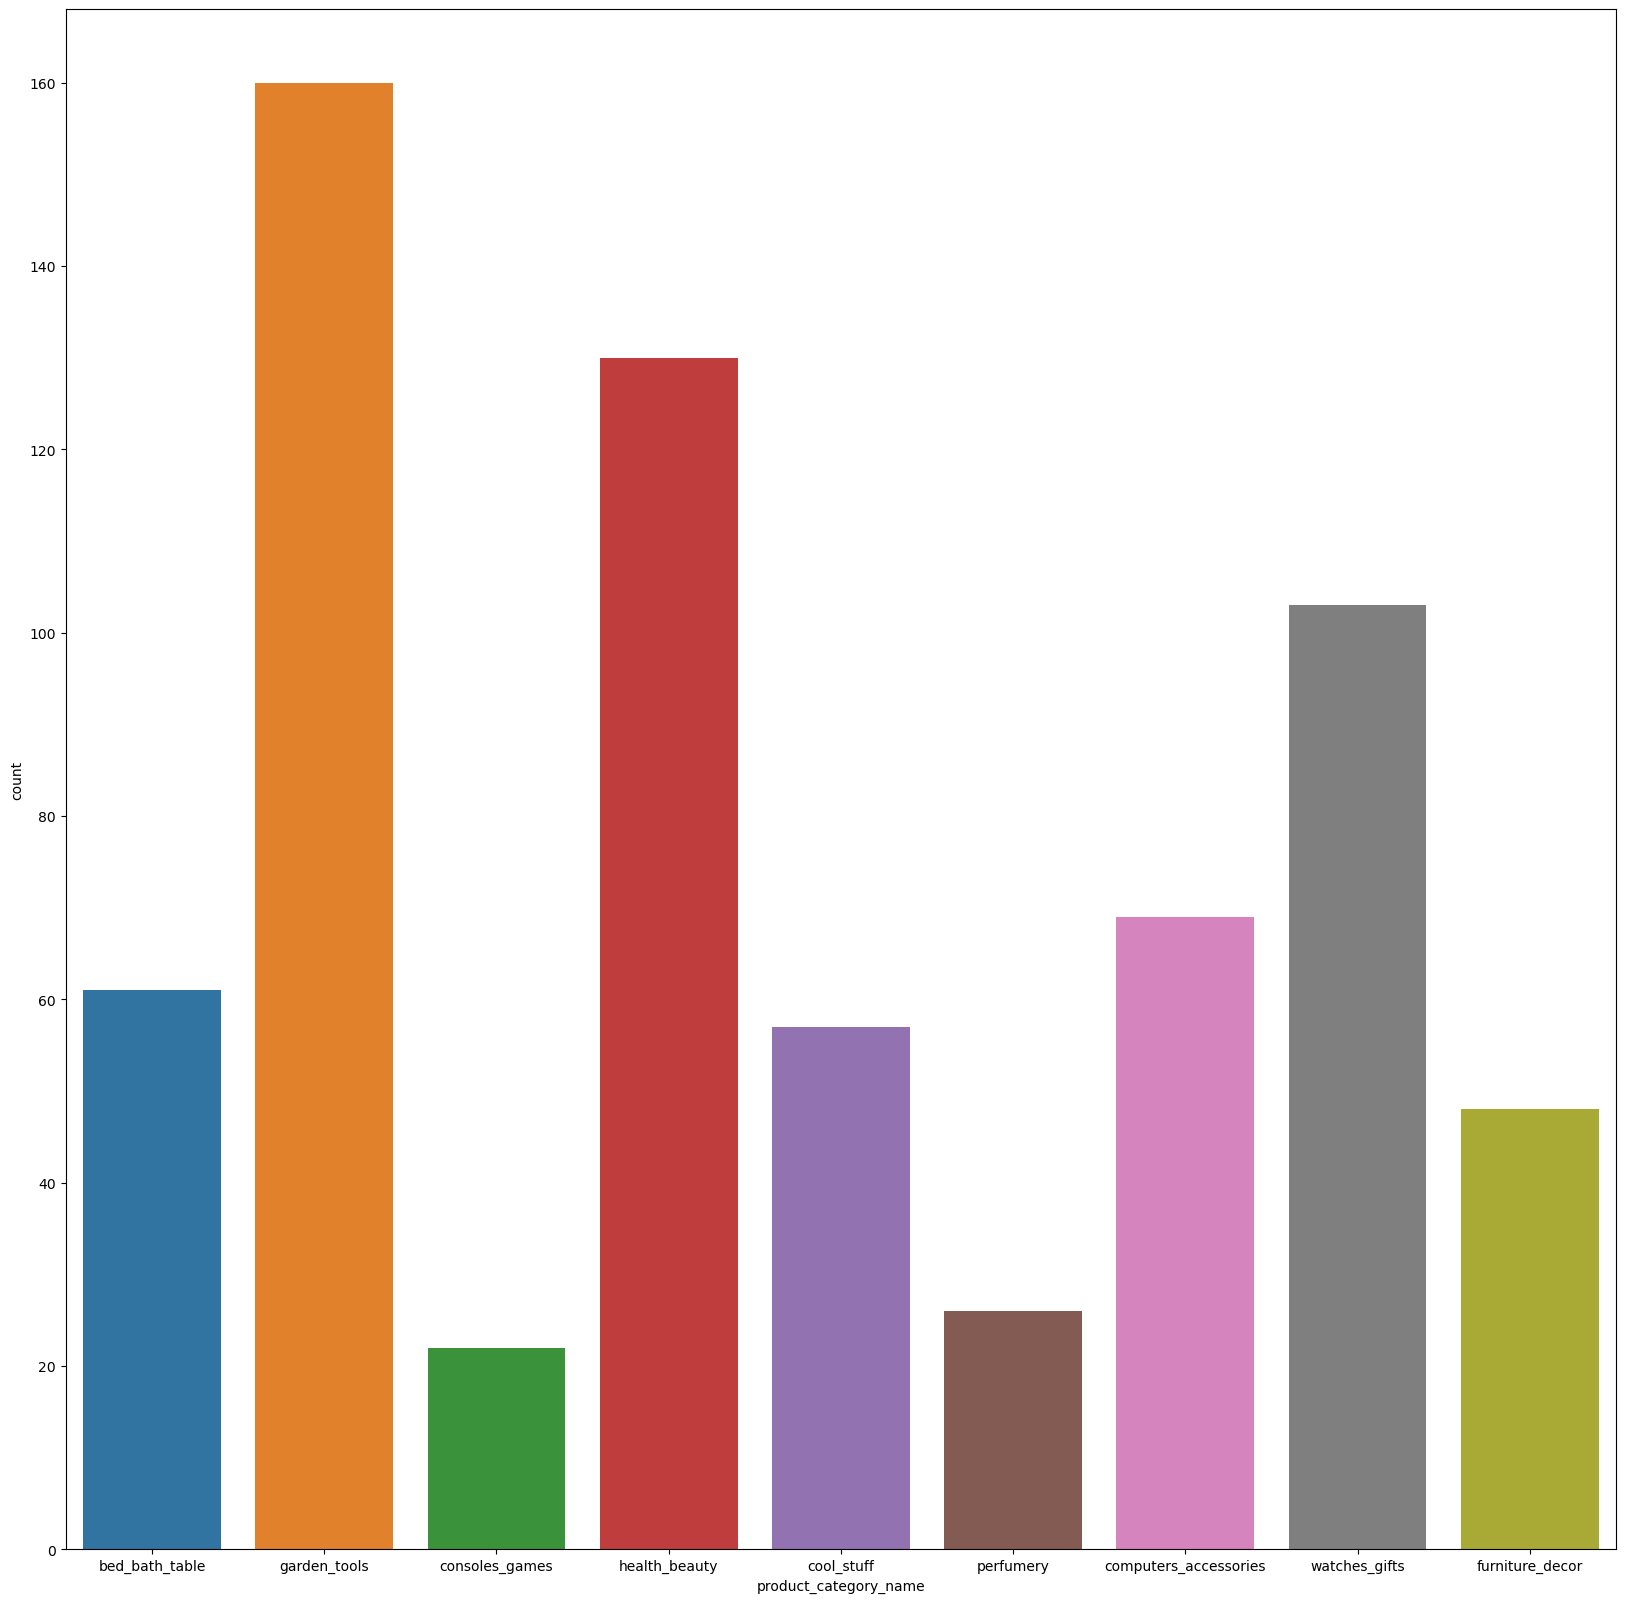

In [116]:
plt.figure(figsize=(20,20))
sns.countplot(new_df.product_category_name);

'''A pairplot plot a pairwise relationships in a dataset. It shows the relationship between two variables.
It helps us understand the data by summarising a large amount of data in a single figure
The plots are in matrix format where the row name represents x axis and column name represents the y axis.
The main-diagonal subplots are the univariate histograms (distributions) for each attribute.'''


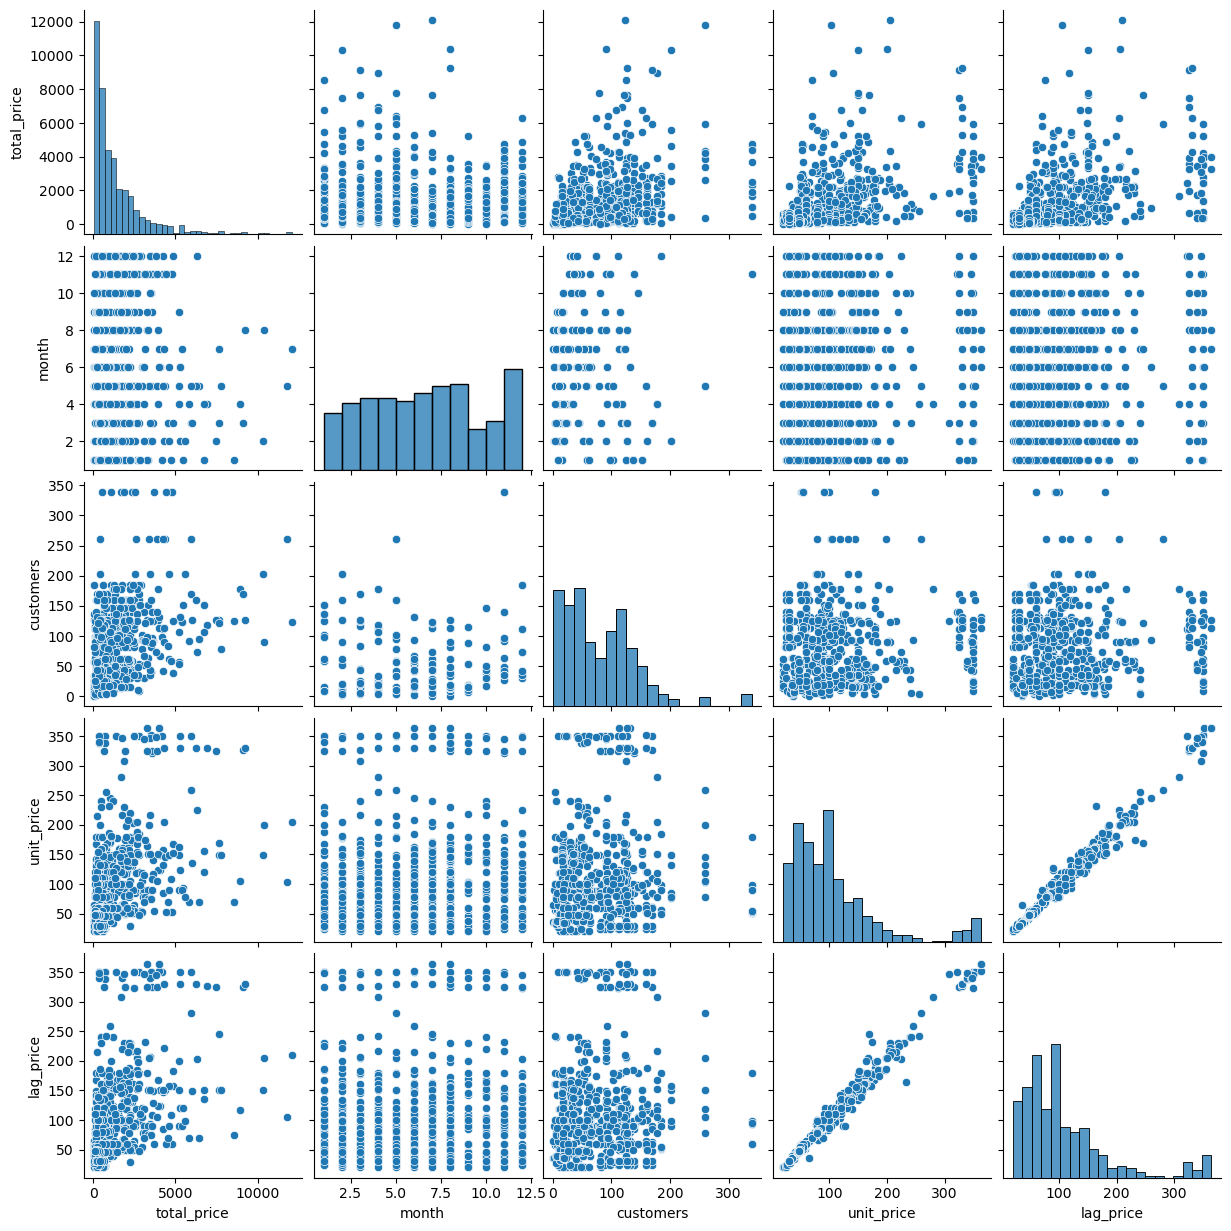

In [121]:
sub_df=new_df[['total_price','month','customers','unit_price','lag_price']]
sns.pairplot(sub_df)

#A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution

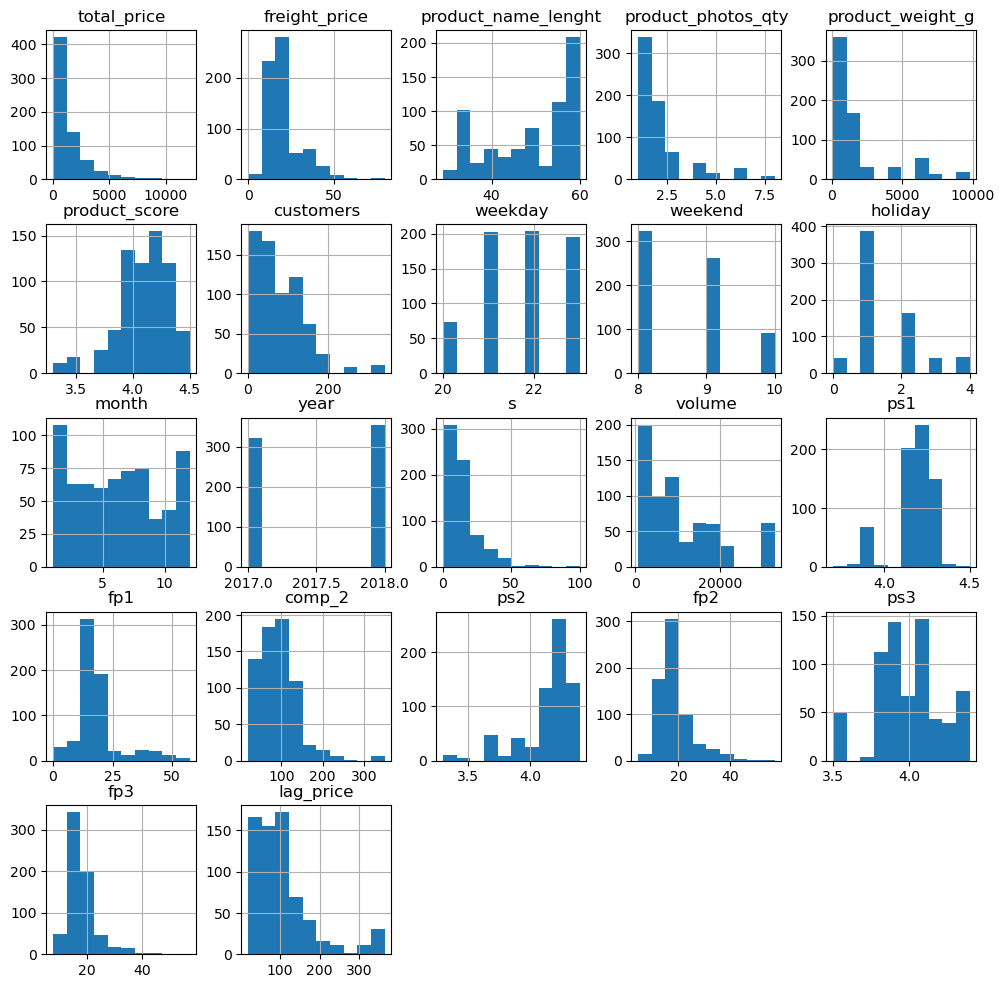

In [32]:
new_df.hist(figsize=(12,12));

# Encoding

#converting categorical variables into numerical values so that it could be easily fitted to a machine learning model 

In [125]:
enc=pd.get_dummies(new_df["product_category_name"])
enc

,bed_bath_table,computers_accessories,consoles_games,cool_stuff,furniture_decor,garden_tools,health_beauty,perfumery,watches_gifts
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
680,1,0,0,0,0,0,0,0,0
681,1,0,0,0,0,0,0,0,0
682,1,0,0,0,0,0,0,0,0
683,1,0,0,0,0,0,0,0,0


In [34]:
new_df.drop("product_category_name",axis=1,inplace=True)

In [35]:
new_df=pd.concat([new_df,enc],axis=1)
new_df.head()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,lag_price,bed_bath_table,computers_accessories,consoles_games,cool_stuff,furniture_decor,garden_tools,health_beauty,perfumery,watches_gifts
0,1,45.95,15.100000,45.95,39.0,161,2.0,350.0,4.0,57.0,...,45.90,1,0,0,0,0,0,0,0,0
1,3,137.85,12.933333,45.95,39.0,161,2.0,350.0,4.0,61.0,...,45.95,1,0,0,0,0,0,0,0,0
2,6,275.70,14.840000,45.95,39.0,161,2.0,350.0,4.0,123.0,...,45.95,1,0,0,0,0,0,0,0,0
3,4,183.80,14.287500,45.95,39.0,161,2.0,350.0,4.0,90.0,...,45.95,1,0,0,0,0,0,0,0,0
5,2,91.90,15.100000,45.95,39.0,161,2.0,350.0,4.0,54.0,...,45.95,1,0,0,0,0,0,0,0,0


In [124]:
from datetime import datetime
new_df["month_year"] = pd.to_datetime(new_df.month_year)
new_df["day"]=new_df["month_year"].dt.day
new_df.head()

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,day
0,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39.0,161,2.0,350.0,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,5
1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39.0,161,2.0,350.0,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,6
2,bed_bath_table,2017-01-07,6,275.70,14.840000,45.95,39.0,161,2.0,350.0,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,7
3,bed_bath_table,2017-01-08,4,183.80,14.287500,45.95,39.0,161,2.0,350.0,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,8
5,bed_bath_table,2017-01-09,2,91.90,15.100000,45.95,39.0,161,2.0,350.0,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,9


# Corellation Analysis

#To understand the relationship between different attributes in the dataset, we will plot a correlation matrix using the following code. The above correlation matrix shows that more than one independent variable affects the output (higher negative value or positive values indicate a strong correlation), i.e., lag_price. For example, a correlation value of -0.8 or lower will indicate a strong negative relationship whereas a value of 0.8 or higher will indicate a strong positive relationship between the input and output variables

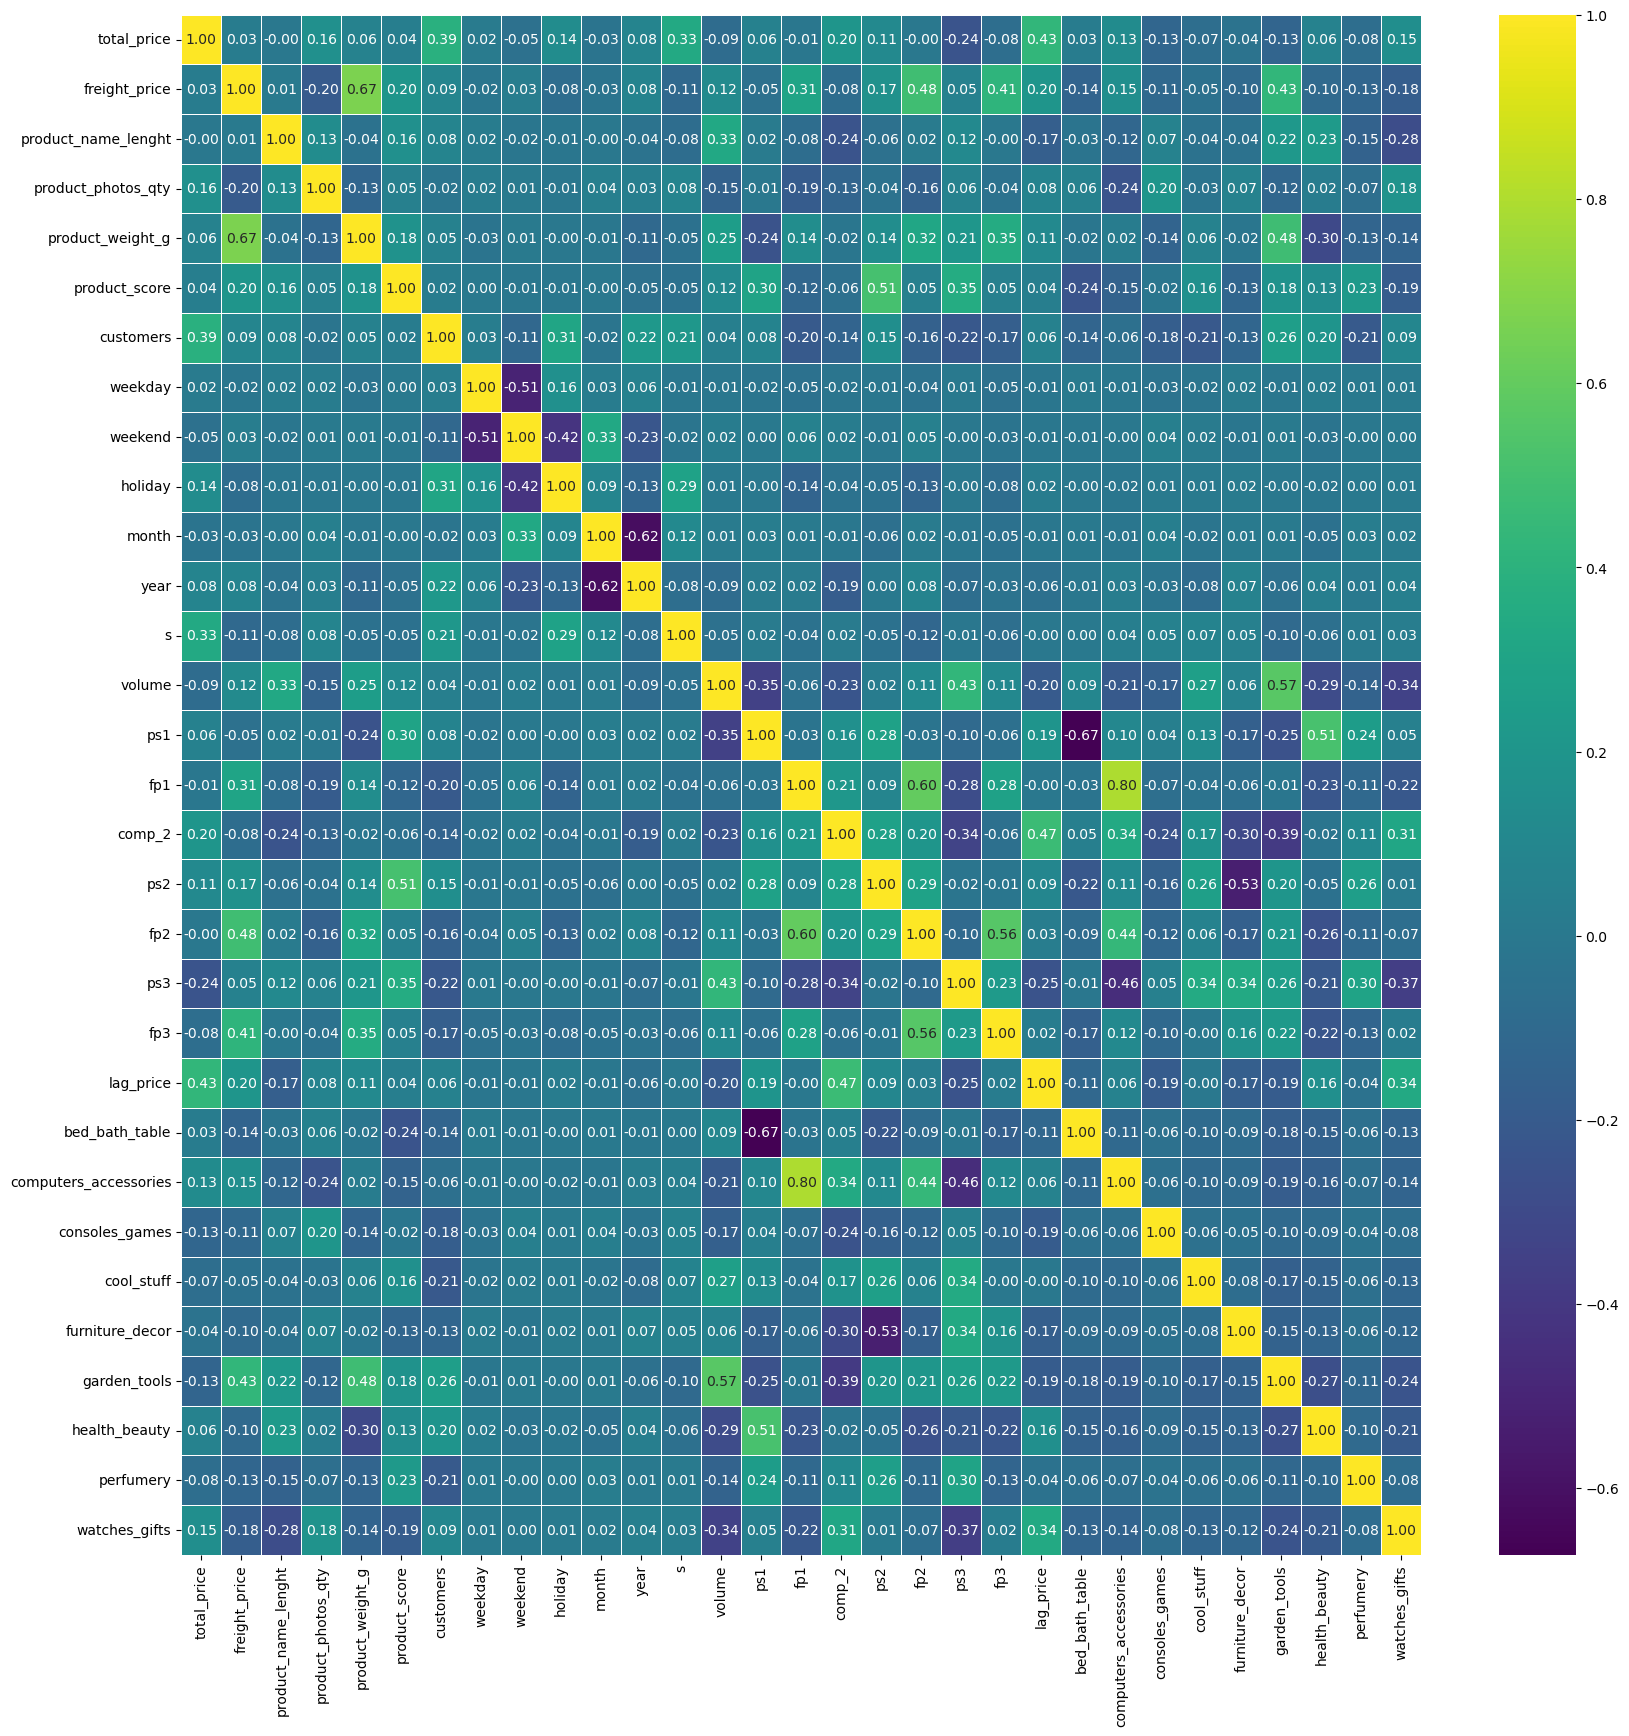

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="viridis")
plt.show()


In [39]:
cor=new_df.corr()["lag_price"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with lag_price":cor.values})

,column,Correlation with lag_price
0,lag_price,1.000000
1,comp_2,0.465271
2,total_price,0.426256
3,watches_gifts,0.335569
4,freight_price,0.201143
5,ps1,0.194805
6,health_beauty,0.156513
7,product_weight_g,0.112790
8,ps2,0.092632
9,product_photos_qty,0.075246


# Machine Learning


#The first thing we need to do is split our data into an X (which contains the data that we will use to make predictions) and y (which contains the data that we are trying to predict).

First, we should decide which columns to include. You can generate a list of the DataFrame’s columns using new_df,columns, which outputs.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.svm import SVR

#We will be using all of these variables in the X except for lag_price(since that’s the variable we’re trying to predict).

Let’s create our X and assign it to a variable called X.

Next, let’s create y and assign it to a variable called y.

In [54]:
X=new_df.drop("lag_price",axis=1)
y=new_df["lag_price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

#We have successfully divided our data set into an x (which are the input values of our model) and a y (which are the output values of our model). We’ll learn how to split our data set further into training data and test data in the next section.

Scikit-learn makes it very easy to divide our data set into training data and test data. To do this, we’ll need to import the function train_test_split from the model_selection module of scikit-learn.

The train_test_split data accepts three arguments:

Our X
Our y
The desired size of our test data
With these parameters, the train_test_split function will split our data for us! Here’s the code to do this if we want our test data to be 30% of the entire data set:

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Let’s unpack what is happening here.

The train_test_split function returns a Python list of length 4, where each item in the list is x_train, x_test, y_train, and y_test, respectively. We then use list unpacking to assign the proper values to the correct variable names.

Now that we have properly divided our data set, it is time to build and train our linear regression machine learning model.

In [56]:
# loading the linear regression model 
lin_reg_model = LinearRegression() 
#Now we can fit the model to our dataset 
lin_reg_model.fit(X_train,y_train) 

LinearRegression()

#Building and Training the Model
The first thing we need to do is import the LinearRegression estimator from scikit-learn. Here is the Python statement for this.

Next, we need to create an instance of the Linear Regression Python object. We will assign this to a variable called model. Here is the code for this:

We can use scikit-learn’s fit method to train this model on our training data.

In [66]:
# prediction on Training data 
training_data_prediction = lin_reg_model.predict(X_train) 

# The model has now been trained.

#Regression Evaluation Metrics

In [58]:
# R squared Error 
train_error_score = metrics.r2_score(y_train, training_data_prediction) 
print("R squared Error - Training : ", train_error_score) 

R squared Error - Training :  0.9912393155292403


In [59]:
y_pred = lin_reg_model.predict(X_test)

In [60]:
test_error_score = metrics.r2_score(y_test, y_pred) 
print("R squared Error - Test: ", test_error_score) 

R squared Error - Test:  0.9860251637082441


<AxesSubplot:xlabel='lag_price'>

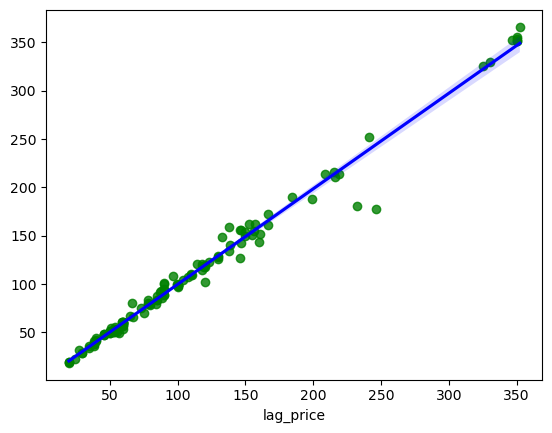

In [61]:
sns.regplot(y_test, y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 